In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Survey_ Social Media Use and Well-being (Responses) - Form responses 1.csv')

response_mapping = {
    "not at all": 0,
    "several days": 1,
    "more than half the days": 2,
    "nearly every day": 3
}

columns_to_map = ['question_1', 'question_2', 'question_3', 'question_4', 'question_5', 
                  'question_6', 'question_7', 'question_8', 'question_9']

df_mapped = df[columns_to_map].apply(lambda col: col.map(response_mapping))

df['total_score'] = df_mapped.sum(axis=1)

df.columns = df.columns.str.strip()
df.rename(columns={'Age:': 'Age'}, inplace=True)
df.rename(columns={df.columns[6]: 'Time_spent_on_social_media'}, inplace=True)

new_df = df[['Name', 'Age', 'Gender', 'Time_spent_on_social_media', 'total_score']]
new_df.to_csv('Updated_Social_Media_Responses.csv', index=False)

def categorize_time(time):
    try:
        if isinstance(time, str):
            time_str = time.lower()
            if "More than 5 hours" in time_str:
                return 'More than 5 hrs'
            if "hour" in time_str:
                time_value = int(time_str.split()[0].split('-')[0])
                if 1 <= time_value < 2:
                    return '1-2 hrs'
                elif 2 <= time_value < 3:
                    return '2-3 hrs'
                elif 3 <= time_value < 4:
                    return '3-4 hrs'
                elif 4 <= time_value < 5:
                    return '4-5 hrs'
        return 'Other' 
    except Exception as e:
        return 'Other'

df['Time_Category'] = df['Time_spent_on_social_media'].apply(categorize_time)

grouped_df = df.groupby('Time_Category').agg({'total_score': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Time_Category'], grouped_df['total_score'], color='skyblue')
plt.xlabel('Time Spent on Social Media (hours)')
plt.ylabel('Average Total Score')
plt.title('Average Total Score Based on Time Spent on Social Media')
plt.xticks(rotation=45)
plt.show()

print(new_df.head())


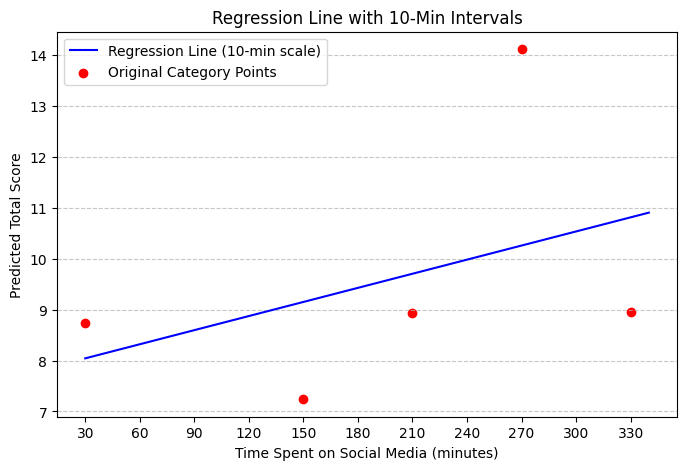

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

time_spent_categories = ["2-3 hours", "3-4 hours", "4-5 hours", "Less than 1 hour", "More than 5 hours"]
time_spent_minutes = [150, 210, 270, 30, 330]
predicted_scores = [7.241, 8.926, 14.114, 8.730, 8.960]

X_continuous = np.array(time_spent_minutes).reshape(-1, 1)
y_continuous = np.array(predicted_scores)
model = LinearRegression()
model.fit(X_continuous, y_continuous)

time_range = np.arange(30, 350, 10).reshape(-1, 1)
predicted_continuous_scores = model.predict(time_range)

plt.figure(figsize=(8, 5))
plt.plot(time_range, predicted_continuous_scores, linestyle="-", color="b", label="Regression Line (10-min scale)")
plt.scatter(time_spent_minutes, predicted_scores, color="red", label="Original Category Points")
plt.xlabel("Time Spent on Social Media (minutes)")
plt.ylabel("Predicted Total Score")
plt.title("Regression Line with 10-Min Intervals")
plt.xticks(np.arange(30, 350, 30))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()